In [55]:
import pandas as pd;
import numpy as np
import time
import matplotlib.pyplot as plt

In [56]:
ratings = pd.read_csv('./data/datasets/rating/ml_detail.csv', sep=',',encoding='latin-1')

print("Số lượng bản ghi")
print("----------------")
print(ratings.shape)
print("----------------")

Số lượng bản ghi
----------------
(93246, 7)
----------------


In [57]:
ratings.head()

,movie id,user id,rating,content,date,movie index,user index
0,tt0102813,ur0391152,2,I've always had kind of a perverse curiosity a...,22 August 2010,6914,81
1,tt0387808,ur0391152,5,20th Century Fox was moronic not to release th...,6 November 2006,3393,81
2,tt0845046,ur0391152,5,It's the kind of movie that reminds me that th...,28 September 2008,3507,81
3,tt0113824,ur0391152,5,"A very moving animÃ© film from Studio Ghibli, ...",29 September 2003,3181,81
4,tt0455538,ur0391152,2,Based on the autobiographical tale of writer T...,6 October 2008,4699,81


In [58]:
movies = pd.read_csv('./data/datasets/movie/ml_detail.csv', sep=',', encoding='latin-1')
movies.head()

,movie id,title,series,release year,certification,duration,average rating,rating total,genre list,content,...,Horror,Documentary,Mystery,Western,Fantasy,Comedy,Sport,Talk-Show,Crime,Romance
0,tt0102813,Rover Dangerfield,NaN,1991,G,1h 14m,6.0,3K,Animation|Comedy|Family,A Vegas show dog gets ditched in the sticks an...,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,tt1086761,Keeping Up with the Kardashians,TV Series,2006â2021,TV-14,44m,2.8,29K,Drama|Family|Reality-TV,A peek inside the exploits and privileged priv...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,tt0075686,Annie Hall,NaN,1977,PG,1h 33m,8.0,259K,Comedy|Romance,"Alvy Singer, a divorced Jewish comedian, refle...",...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,tt1402488,Happy Feet Two,NaN,2011,PG,1h 40m,5.9,44K,Animation|Adventure|Comedy,"Mumble's son, Erik, is struggling to realize h...",...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,tt1087461,Megan Is Missing,NaN,2011,Not Rated,1h 25m,4.5,12K,Drama|Horror|Thriller,Two teenage girls encounter an Internet child ...,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [59]:
movies['title'][:10]

0                  Rover Dangerfield
1    Keeping Up with the Kardashians
2                         Annie Hall
3                     Happy Feet Two
4                   Megan Is Missing
5                        Logan Lucky
6                       Cold Pursuit
7                          The Stuff
8                      Come to Daddy
9                       Danger Mouse
Name: title, dtype: object

In [60]:
average_ratings_per_movie = ratings.groupby('movie id').mean()['rating']
movie_ids_overrated = average_ratings_per_movie[average_ratings_per_movie >= 4] 

In [61]:
average_ratings_per_movie

movie id
tt0000417    4.272727
tt0010323    4.500000
tt0013257    4.200000
tt0013442    4.000000
tt0015324    4.272727
               ...   
tt9894470    3.411765
tt9896876    4.000000
tt9898858    2.470588
tt9899340    3.846154
tt9900092    2.923077
Name: rating, Length: 8352, dtype: float64

In [62]:
average_ratings_df = pd.DataFrame(columns=['movie id', 'relative average rating'])

In [63]:
average_ratings_df['movie id'] = average_ratings_per_movie.index.tolist()
average_ratings_df['relative average rating'] = average_ratings_per_movie.tolist()

In [64]:
average_ratings_df

,movie id,relative average rating
0,tt0000417,4.272727
1,tt0010323,4.500000
2,tt0013257,4.200000
3,tt0013442,4.000000
4,tt0015324,4.272727
...,...,...
8347,tt9894470,3.411765
8348,tt9896876,4.000000
8349,tt9898858,2.470588
8350,tt9899340,3.846154


In [65]:
movies_util = pd.merge(movies, average_ratings_df, how='inner', on='movie id')

In [66]:
movies_util

,movie id,title,series,release year,certification,duration,average rating,rating total,genre list,content,...,Documentary,Mystery,Western,Fantasy,Comedy,Sport,Talk-Show,Crime,Romance,relative average rating
0,tt0102813,Rover Dangerfield,NaN,1991,G,1h 14m,6.0,3K,Animation|Comedy|Family,A Vegas show dog gets ditched in the sticks an...,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.000000
1,tt1086761,Keeping Up with the Kardashians,TV Series,2006â2021,TV-14,44m,2.8,29K,Drama|Family|Reality-TV,A peek inside the exploits and privileged priv...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.666667
2,tt0075686,Annie Hall,NaN,1977,PG,1h 33m,8.0,259K,Comedy|Romance,"Alvy Singer, a divorced Jewish comedian, refle...",...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,3.818182
3,tt1402488,Happy Feet Two,NaN,2011,PG,1h 40m,5.9,44K,Animation|Adventure|Comedy,"Mumble's son, Erik, is struggling to realize h...",...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.076923
4,tt1087461,Megan Is Missing,NaN,2011,Not Rated,1h 25m,4.5,12K,Drama|Horror|Thriller,Two teenage girls encounter an Internet child ...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8347,tt0109446,The Client,NaN,1994,PG-13,1h 59m,6.8,64K,Crime|Drama|Mystery,A young boy who witnessed the suicide of a maf...,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.461538
8348,tt1845307,2 Broke Girls,TV Series,2011â2017,TV-14,22m,6.6,94K,Comedy,Two young women waitressing at a greasy spoon ...,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.000000
8349,tt0405296,A Scanner Darkly,NaN,2006,R,1h 40m,7.1,110K,Animation|Crime|Drama,An undercover cop in a not-too-distant future ...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.100000
8350,tt0088889,Cat's Eye,NaN,1985,PG-13,1h 34m,6.3,24K,Comedy|Horror|Thriller,A stray cat is the linking element of three ta...,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.153846


In [67]:
def convert_to_int(x):
    if 'K' in str(x):
        x = str(x)[:-1]
        x = float(x)
        x = x * 1000
    elif 'M' in str(x):
        x = str(x)[:-1]
        x = float(x)
        x = x * 1000000
    
    return x

In [68]:
movies_util['rating total'] = movies_util['rating total'].apply(convert_to_int)
movies_util['rating total'] = pd.to_numeric(movies_util['rating total'])

In [69]:
movies_util

,movie id,title,series,release year,certification,duration,average rating,rating total,genre list,content,...,Documentary,Mystery,Western,Fantasy,Comedy,Sport,Talk-Show,Crime,Romance,relative average rating
0,tt0102813,Rover Dangerfield,NaN,1991,G,1h 14m,6.0,3000.0,Animation|Comedy|Family,A Vegas show dog gets ditched in the sticks an...,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.000000
1,tt1086761,Keeping Up with the Kardashians,TV Series,2006â2021,TV-14,44m,2.8,29000.0,Drama|Family|Reality-TV,A peek inside the exploits and privileged priv...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.666667
2,tt0075686,Annie Hall,NaN,1977,PG,1h 33m,8.0,259000.0,Comedy|Romance,"Alvy Singer, a divorced Jewish comedian, refle...",...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,3.818182
3,tt1402488,Happy Feet Two,NaN,2011,PG,1h 40m,5.9,44000.0,Animation|Adventure|Comedy,"Mumble's son, Erik, is struggling to realize h...",...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.076923
4,tt1087461,Megan Is Missing,NaN,2011,Not Rated,1h 25m,4.5,12000.0,Drama|Horror|Thriller,Two teenage girls encounter an Internet child ...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8347,tt0109446,The Client,NaN,1994,PG-13,1h 59m,6.8,64000.0,Crime|Drama|Mystery,A young boy who witnessed the suicide of a maf...,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.461538
8348,tt1845307,2 Broke Girls,TV Series,2011â2017,TV-14,22m,6.6,94000.0,Comedy,Two young women waitressing at a greasy spoon ...,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.000000
8349,tt0405296,A Scanner Darkly,NaN,2006,R,1h 40m,7.1,110000.0,Animation|Crime|Drama,An undercover cop in a not-too-distant future ...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.100000
8350,tt0088889,Cat's Eye,NaN,1985,PG-13,1h 34m,6.3,24000.0,Comedy|Horror|Thriller,A stray cat is the linking element of three ta...,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.153846


In [70]:
movies_util.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8352 entries, 0 to 8351
Data columns (total 44 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   movie id                 8352 non-null   object 
 1   title                    8352 non-null   object 
 2   series                   2243 non-null   object 
 3   release year             8035 non-null   object 
 4   certification            8146 non-null   object 
 5   duration                 8126 non-null   object 
 6   average rating           8351 non-null   float64
 7   rating total             8351 non-null   float64
 8   genre list               8352 non-null   object 
 9   content                  8352 non-null   object 
 10  countries of origin      8281 non-null   object 
 11  official sites           5458 non-null   object 
 12  languages                8242 non-null   object 
 13  production companies     0 non-null      float64
 14  budget                  

In [71]:
average_good_ratings_per_movie = movies_util[movies_util['average rating'] >= 8]
average_good_ratings_per_movie

,movie id,title,series,release year,certification,duration,average rating,rating total,genre list,content,...,Documentary,Mystery,Western,Fantasy,Comedy,Sport,Talk-Show,Crime,Romance,relative average rating
2,tt0075686,Annie Hall,NaN,1977,PG,1h 33m,8.0,259000.0,Comedy|Romance,"Alvy Singer, a divorced Jewish comedian, refle...",...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,3.818182
15,tt1392190,Mad Max: Fury Road,NaN,2015,R,2h,8.1,939000.0,Action|Adventure|Sci-Fi,"In a post-apocalyptic wasteland, a woman rebel...",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.333333
27,tt10048342,The Queen's Gambit,TV Mini Series,2020,TV-MA,6h 35m,8.6,368000.0,Drama,"Orphaned at the tender age of nine, prodigious...",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.647059
28,tt3783958,La La Land,NaN,2016,PG-13,2h 8m,8.0,545000.0,Comedy|Drama|Music,"While navigating their careers in Los Angeles,...",...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.750000
35,tt0904208,Californication,TV Series,2007â2014,TV-MA,28m,8.3,176000.0,Comedy|Drama,"A writer tries to juggle his career, his relat...",...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.888889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8319,tt1119176,Underbelly,NaN,NaN,2008â2013,1h,8.1,4600.0,Action|Crime|Drama,Each season of this multi award winning Televi...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.800000
8335,tt1077744,Lark Rise to Candleford,TV Series,2008â2011,TV-PG,53m,8.1,7200.0,Drama|Romance,An adaptation of Flora Thompson's autobiograph...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.166667
8336,tt3230854,The Expanse,TV Series,2015â,TV-14,1h,8.5,127000.0,Drama|Mystery|Sci-Fi,"In the 24th century, a group of humans untangl...",...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.631579
8343,tt5797194,W,NaN,NaN,2016,1h,8.1,8500.0,Drama|Fantasy|Romance,A love story between a couple in their early t...,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.900000


In [72]:
themes = set()
for group_theme in movies_util['genre list']:
    cates = group_theme.split("|")
    for cate in cates:
        themes.add(cate)
themes

{'Action',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Film-Noir',
 'Game-Show',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'News',
 'Reality-TV',
 'Romance',
 'Sci-Fi',
 'Short',
 'Sport',
 'Talk-Show',
 'Thriller',
 'War',
 'Western'}

In [73]:
movies_per_theme = []

for theme in themes:
    movies_per_theme.append(movies_util[movies_util[theme] == 1]['movie id'])


In [74]:
average_ratings_per_theme = []
no_movies_per_theme = []

for i in range(len(movies_per_theme)):
    score = movies_util[movies_util['movie id'].isin(movies_per_theme[i])]['average rating'].mean()
    average_ratings_per_theme.append(score)
    quantity = movies_util[movies_util['movie id'].isin(movies_per_theme[i])]['average rating'].count()
    no_movies_per_theme.append(quantity)

C:\Users\Pc\AppData\Local\Temp/ipykernel_9492/2039347007.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(x, rotation=90, size=10)


Text(0, 0.5, 'Number of users rating movies in per theme')

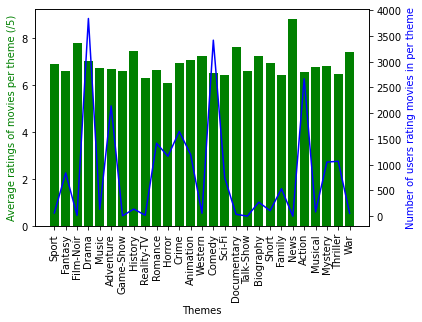

In [75]:
x = list(themes)
y1 = average_ratings_per_theme
y2 = no_movies_per_theme

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(x, y1, color='g')
ax2.plot(x, y2, 'b-')

ax1.set_xticklabels(x, rotation=90, size=10)
ax1.set_xlabel('Themes')
ax1.set_ylabel('Average ratings of movies per theme (/5)', color='g')
ax2.set_ylabel('Number of users rating movies in per theme', color='b')

In [76]:
users = ratings['user id'].value_counts().index.tolist()
movies = ratings['movie id'].value_counts().index.tolist()

In [89]:
print("Length of rating data: ", len(ratings))
print("Length of movie data: ", len(movies))
print("Length of user data: ", len(users))

sparsity = 1 - len(ratings) / (len(movies) * len(users))
print(f'Sparsity of rating data: {sparsity:f}')

Length of rating data:  93246
Length of movie data:  8352
Length of user data:  1390
Sparsity of rating data: 0.991968


In [91]:
ratings['date']

0           22 August 2010
1          6 November 2006
2        28 September 2008
3        29 September 2003
4           6 October 2008
               ...        
93241      30 January 2009
93242     18 February 2014
93243     11 November 2013
93244      17 January 2011
93245     18 February 2014
Name: date, Length: 93246, dtype: object

In [92]:
def month_string_to_number(string):
    m = {
        'jan': 1,
        'feb': 2,
        'mar': 3,
        'apr':4,
         'may':5,
         'jun':6,
         'jul':7,
         'aug':8,
         'sep':9,
         'oct':10,
         'nov':11,
         'dec':12
        }
    s = string.strip()[:3].lower()

    try:
        out = m[s]
        return out
    except:
        raise ValueError('Not a month')

In [81]:
def get_day(date):
    d_m_y = date.split(" ")
    d_m_y[1] = month_string_to_number(d_m_y[1])
    d_m_y = [str(i) for i in d_m_y]
    return " ".join(d_m_y)

In [82]:
ratings['day'] = ratings['date'].apply(get_day)

In [83]:
ratings['day']

0         22 8 2010
1         6 11 2006
2         28 9 2008
3         29 9 2003
4         6 10 2008
            ...    
93241     30 1 2009
93242     18 2 2014
93243    11 11 2013
93244     17 1 2011
93245     18 2 2014
Name: day, Length: 93246, dtype: object

In [84]:
import datetime
import calendar

def findDay(date):
    born = datetime.datetime.strptime(date, '%d %m %Y').weekday()
    return (calendar.day_name[born])

In [85]:
ratings['day'] = ratings['day'].apply(findDay)

In [86]:
ratings

,movie id,user id,rating,content,date,movie index,user index,day
0,tt0102813,ur0391152,2,I've always had kind of a perverse curiosity a...,22 August 2010,6914,81,Sunday
1,tt0387808,ur0391152,5,20th Century Fox was moronic not to release th...,6 November 2006,3393,81,Monday
2,tt0845046,ur0391152,5,It's the kind of movie that reminds me that th...,28 September 2008,3507,81,Sunday
3,tt0113824,ur0391152,5,"A very moving animÃ© film from Studio Ghibli, ...",29 September 2003,3181,81,Monday
4,tt0455538,ur0391152,2,Based on the autobiographical tale of writer T...,6 October 2008,4699,81,Monday
...,...,...,...,...,...,...,...,...
93241,tt1349938,ur4374846,5,I am in love with a new TV show. I don't know ...,30 January 2009,6147,1326,Friday
93242,tt2365946,ur4374846,1,Bitten: Mid-season review: Who am I supposed t...,18 February 2014,6277,1326,Tuesday
93243,tt2296682,ur4374846,1,Where do I begin? When I first started watchin...,11 November 2013,6876,1326,Monday
93244,tt1595680,ur4374846,4,I just watched the American Being Human and I ...,17 January 2011,7319,1326,Monday


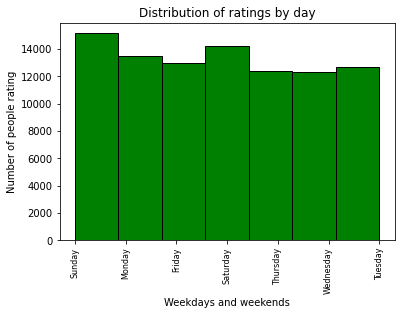

In [87]:
num_bins = 7
plt.hist(ratings['day'], num_bins, ec='black', color='green')
plt.xticks(range(0, 7), size=8, rotation=90)
plt.xlabel('Weekdays and weekends')
plt.ylabel('Number of people rating')
plt.title('Distribution of ratings by day')
plt.show()